# **3.8 - Minimamente aceitável** 🧐

**Objetivo:** Use um algoritmo genético para encontrar as coordenadas (x, y) dos mínimos globais da função de Himmelblau abaixo.

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

***

### **Introdução** 💡

Amplamente conhecida no universo da otimização, a função de Himmelblau, introduzida pelo engenheiro químico David Mautner Himmelblau, é um dos problemas mais utilizados para a testagem de algoritmos de minimização. Isso porque possui 4 raízes, as quais, apesar de poderem ser resolvidas por meio de métodos analíticos, são de difícil obtenção (exigem a resolução de um polinômio quártico).

Os seus mínimos globais podem ser encontrados nas seguintes localizações:
* $x$ = 3.0, $y$ = 2.0
* $x$ = 2.805118, $y$ = 3.131312
* $x$ = 3.779310, $y$ = 3.283186
* $x$ = 3.584458, $y$ = 1.848126

Para encontrar esses valores de forma mais simples, é possível utilizar algoritmos genéticos. Como particularidade desse problema, é necessário criar uma função de inicialização de população com os genes possuindo valores de x e y definidos no intervalo $-5 <= x,y >= 5$ (limites amplamente conhecidos para a função em questão) e, para a função de fitness, a própria função de Himmelblau. [2]

Nesse sentido, esse notebook visa encontrar as coordenadas dos mínimos globais utilizando como base o modelo de algoritmo genético definido ao longo da disciplina. Além das operações mencionadas (específicas para o problema), serão utilizados operadores de seleção por torneio, cruzamento por ponto simples e mutação por salto. 

Para que diferentes soluções possam ser encontradas, a seed 

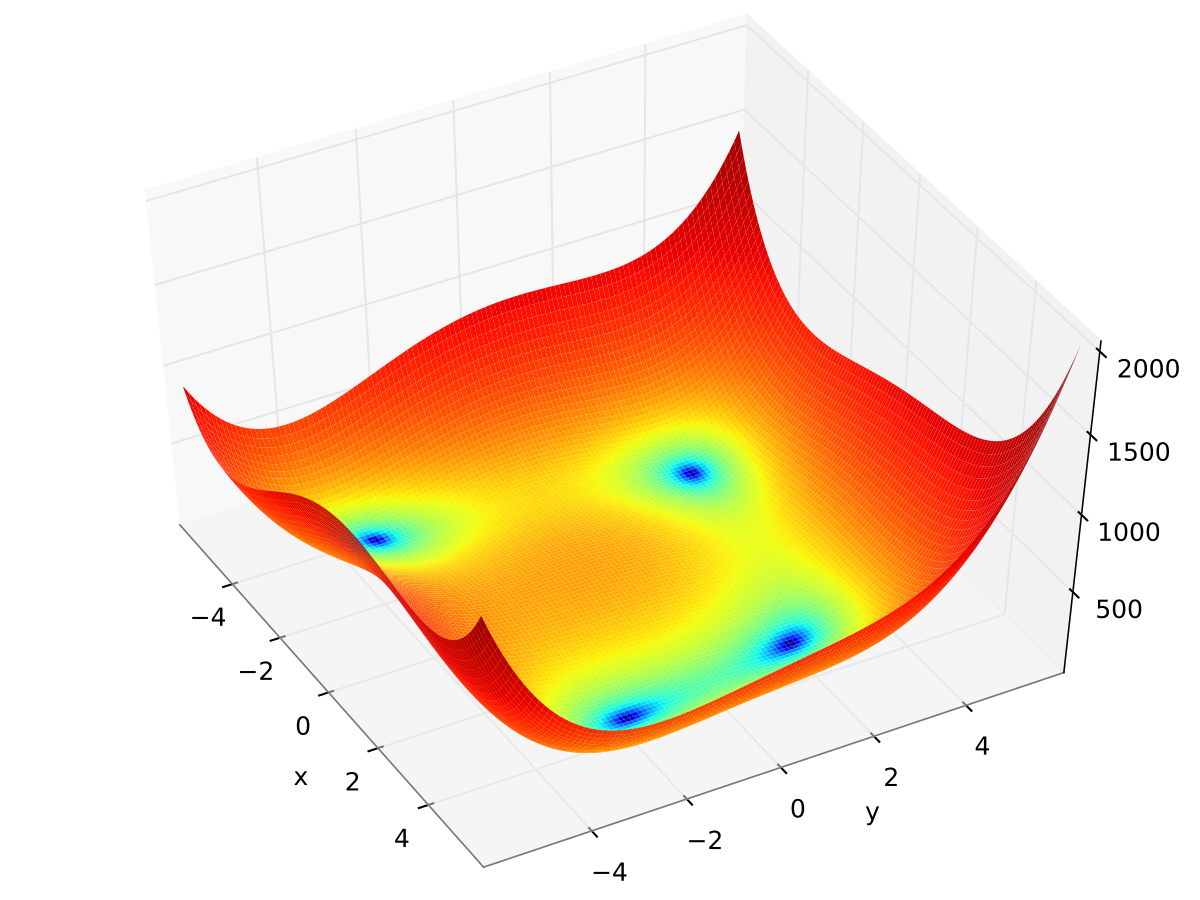

<p style="text-align:center;">
[Figura 1: Plot da função de Himmelblau em 3D] [1]
</p>

### **Importação de bibliotecas** 📚

Em primeiro lugar, precisamos importar as bibliotecas necessárias para a resolução do problema.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### **Criando a população** 🫂

Como primeira etapa para a construção do algoritmo, é possível implementar funções que auxiliem na criação da população inicial. Para o gene (nesse caso, a variável x ou y), a função ``gene_funcao`` será utilizada, a qual sorteia valores aleatórios entre -5 e 5 (fronteiras mencionadas anteriormente). Dois genes serão utilizados para a composição de um candidato e, a partir disso, a função conseguirá criar uma população formada por $n$ indivíduos. Para o problema em questão, o número de 10 candidatos será considerado. 

In [2]:
def gene_funcao(minimo, maximo):
    """Sorteia valor para a variável.
    
    Args:
    minimo: limite inferior do intervalo
    maximo: limite superior do intervalo
    """
    
    variavel = random.uniform(minimo, maximo)
    return variavel

In [3]:
def cria_candidato_funcao(quant_variaveis, minimo, maximo):
    """Cria um candidato para o problema da senha

    Args:
      quant_variaveis: quantidade de variáveis presente na função
      minimo: limite inferior do intervalo
      maximo: limite superior do intervalo
    """
    candidato = []

    for _ in range(quant_variaveis):
        candidato.append(gene_funcao(minimo, maximo))

    return candidato

In [4]:
def populacao_funcao(tamanho_populacao, quant_variaveis, minimo, maximo):
    """Cria população inicial no problema da senha

    Args
      tamanho_populacao: tamanho da população.
      quant_variaveis: quantidade de variáveis presente na função
      minimo: limite inferior do intervalo
      maximo: limite superior do intervalo

    """
    populacao = []

    for _ in range(tamanho_populacao):
        populacao.append(cria_candidato_funcao(quant_variaveis, minimo, maximo))

    return populacao

### **Função Objetivo** 🎯

Como função objetivo - isto é, métrica utilizada para medir a aptidão de cada indivíduo - a própria função de Himmeblau será utilizada. Isso porque, quanto mais próximo de zero for o resultado da função aplicada aos valores de $x$ e $y$ do candidato, mais próximo esse candidato se encontra de resolver o problema. Para avaliar cada indivíduo, a função ``funcao_objetivo_Himmelblau`` será utilizada, enquanto a função ``funcao_objetivo_pop_Himmelblau`` computará essa métrica para toda a população. 

In [5]:
def funcao_objetivo_Himmelblau(candidato):
    """Computa a função objetivo de um candidato no problema de minimização da função de Himmelblau
    
    Args: 
    candidato: lista com um palpite para os valores de x e y
    """
    x = candidato[0]
    y = candidato[1]
    
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7)** 2
    return f

In [6]:
def funcao_objetivo_pop_Himmelblau(populacao):
    """Computa a funcao objetivo de uma populaçao no problema da senha.

    Args:
      populacao: lista contendo os individuos do problema
    """
    fitness = []

    for individuo in populacao:
        fitness.append(funcao_objetivo_Himmelblau(individuo))

    return fitness

### **Operadores Genéticos** 🧬

Em relação aos demais operadores genéticos utilizados, será adotada a função ``selecao_torneio_min ``como método de seleção. Considerando que os candidatos possuem apenas dois elementos, opta-se pela função ``cruzamento_ponto_simples``, que realiza o cruzamento a partir de uma única divisão no gene. Por fim, para o operador de mutação, será utilizada a ``função mutacao_salto_Himmelblau``. Cabe destacar que o valor de salto adotado está limitado ao intervalo entre 0 e 1, mas deve ser mapeado de forma que permaneça dentro do domínio do problema, que varia de -5 a 5.

In [7]:
def selecao_torneio_min(populacao, fitness, tamanho_torneio):
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    minimização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        min_fitness = min(fitness_sorteados)
        indice_min_fitness = fitness_sorteados.index(min_fitness)
        individuo_selecionado = sorteados[indice_min_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados

In [8]:
def cruzamento_ponto_simples(pai, mae, chance_de_cruzamento):
    """Realiza cruzamento de ponto simples

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    if random.random() < chance_de_cruzamento:
        corte = random.randint(1, len(mae) - 1)
        filho1 = pai[:corte] + mae[corte:]
        filho2 = mae[:corte] + pai[corte:]
        return filho1, filho2
    else:
        return pai, mae

In [ ]:
def mutacao_salto_Himmelblau(populacao, chance_de_mutacao, valores_possiveis = list(np.linspace(-5, 5, 1000))):
    """Realiza mutação de salto

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação
      valores_possiveis: lista com todos os valores possíveis dos genes

    """
    for individuo in populacao:
      if random.random() < chance_de_mutacao:
          gene = random.randint(0, len(individuo) - 1)
          salto = random.uniform(-1, 1)
          novo_valor = individuo[gene] + salto
          novo_valor = max(min(novo_valor, 5), -5)
          individuo[gene] = novo_valor

### **Implementação do algoritmo** 🤖

Finalmente, em relação aos hiperparâmetros para a implementação do algoritmo, a população será formada por 10 candidatos a cada geração, a chance de cruzamento será de 0.5, a chance de mutação de apenas 5% e o tamanho de torneio definido como 3.

In [10]:
TAMANHO_POPULACAO = 10
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

Para que seja possível encontrar as 4 soluções para o problema definido, uma lista de "minimos_globais" será definida, a qual armazerá as soluções não repetidas encontradas pelo algoritmo. Esse processo será repetido até que a lista seja formada por 4 indivíduos e, para que a adição seja realizada, a solução encontrada nessa iteração precisa estar cerca de $10^{-2}$ de distância de qualquer solução presente na lista (para evitar que soluções idênticas - ou muito próximas) sejam consideradas. 

In [ ]:
minimos_globais = []

while len(minimos_globais) < 4:
    populacao = populacao_funcao(TAMANHO_POPULACAO, 2, -5, 5)
    menor_fitness_geral = float("inf")  
    geracao = 0

    while menor_fitness_geral > 1e-6:
        # Seleção
        fitness = funcao_objetivo_pop_Himmelblau(populacao)        
        selecionados = selecao_torneio_min(populacao, fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = cruzamento_ponto_simples(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
        
        # Mutação
        mutacao_salto_Himmelblau(proxima_geracao, CHANCE_DE_MUTACAO)
        
        # Nova geração
        populacao = proxima_geracao
        geracao += 1
        
        # Verifica melhor indivíduo
        fitness = funcao_objetivo_pop_Himmelblau(populacao)
        menor_fitness_observado = min(fitness)
        if menor_fitness_observado < menor_fitness_geral:
            menor_fitness_geral = menor_fitness_observado
            indice = fitness.index(menor_fitness_observado)
            candidato = populacao[indice]
            print(f"Geração {geracao}: {candidato}")

    diferenca = [np.linalg.norm(np.array(candidato) - np.array(m)) for m in minimos_globais]

    if not any(d < 1e-2 for d in diferenca):
        minimos_globais.append(candidato)
        print("Novo mínimo encontrado:", candidato)
    else:
        print("Mínimo repetido, tentando novamente.")


Geração 1: [2.8045837643691276, -2.610264989600135]
Geração 2: [2.8045837643691276, 1.2035375789247338]
Geração 3: [2.8045837643691276, 1.3244022023707116]
Geração 10: [2.8045837643691276, 1.9101560754473985]
Geração 14: [3.157821811273917, 1.7948080769089994]
Geração 24: [3.157821811273917, 1.8115623266066752]
Geração 32: [3.1084812653491047, 1.8115623266066752]
Geração 38: [2.990491007970808, 1.8115623266066752]
Geração 39: [2.990491007970808, 1.8288828390852632]
Geração 64: [3.0823519589316684, 1.8288828390852632]
Geração 67: [3.0823519589316684, 1.9171528820574586]
Geração 72: [3.0192755065832397, 1.9171528820574586]
Geração 122: [3.0192755065832397, 1.9586231306739816]
Geração 381: [3.0192755065832397, 1.9879800907236718]
Geração 540: [2.9971017180086346, 1.9879800907236718]
Geração 870: [2.9971017180086346, 2.0037090272995255]
Geração 1020: [2.9979810024255067, 2.0037090272995255]
Geração 1727: [2.9979810024255067, 2.002992963390963]
Geração 3561: [2.9991255589392916, 2.002992963

In [12]:
minimos_globais

[[3.00013734534617, 1.9998444763478758],
 [-3.77939831937275, -3.2833136771611255],
 [-2.805152108321831, 3.1314099532892143],
 [3.5844886936211537, -1.8481566044206321]]

Ao final, temos que todas as raízes da função de Himmelblau puderam ser encontradas!

### **Conclusão** 😶‍🌫️

De forma geral, foi possível encontrar todas as raízes da função de Himmelblau a partir do algoritmo genético implementado. Como principais modificações para o modelo padrão de algoritmo genético, foi necessária a implementação de uma função de criação de população condizente com os valores esperados para as variáveis $x$ e $y$, bem como a criação de uma função objetivo moldada a partir da própria função de Himmelblau. Vale ainda ressaltar que o tempo de convergência do algoritmo poderia ter sido maior ou menor dependendo de parâmetros (tamanho da população, chance de mutação ou cruzamento e tamanho do torneio por exemplo) utilizados, assim como dos operadores genéticos escolhidos. Portanto, é válido concluir que os algoritmos genéticos são uma alternativa válida para encontrar mínimos de funções que podem ser complexas de resolver de forma puramente análitica. 

### **Referências** 🗃️

[1] Himmelblau’s function. In: Wikipedia. [s.l.: s.n.], 2023. Disponível em: <https://en.wikipedia.org/w/index.php?title=Himmelblau%27s_function&oldid=1192473708>. Acesso em: 6 maio 2025.

[2] WIRSANSKY, Eyal. Hands-On Genetic Algorithms with Python: Applying genetic algorithms to solve real-world deep learning and artificial intelligence problems. [s.l.]: Packt Publishing Ltd, 2020.
